Import the data table to pd Data Frame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [12]:
# connect to sqlite3 database

# Replace with your database file path in Google Drive
db_path = '/content/drive/MyDrive/House Loan Analytics/my_database.db'

conn = sqlite3.connect(db_path)
cursor = conn.cursor()

df_encoded = pd.read_sql("SELECT * FROM Loan_Approval", conn)
# Example query (replace with your actual query)
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

conn.close()

[('raw_data',), ('Loan_Approval',), ('Interest_Rate_Features',)]


In [13]:
df_encoded.head()

,action_taken,purchaser_type,preapproval,reverse_mortgage,open-end_line_of_credit,loan_amount,loan_to_value_ratio,interest_rate,loan_term,negative_amortization,...,occupancy_type_2,occupancy_type_3,submission_of_application_2,initially_payable_to_institution_2,aus-1_2,aus-1_3,aus-1_4,aus-1_5,aus-1_6,aus-1_7
0,5,2,1,0,0,205000.0,80.0,7.000,360.0,0,...,0,0,0,0,0,0,0,0,1,0
1,5,2,1,0,0,235000.0,80.0,6.500,360.0,0,...,0,0,0,0,0,0,0,0,1,0
2,5,2,1,0,0,505000.0,80.0,5.625,360.0,0,...,0,0,0,0,0,0,0,0,1,0
3,5,2,1,0,0,685000.0,80.0,6.375,360.0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,2,1,0,0,455000.0,80.0,5.500,360.0,0,...,0,0,0,0,0,0,0,0,1,0


Models

In [8]:
# Define target variable (Loan Approval)
X = df_encoded.drop(columns=['action_taken'])
y = df_encoded['action_taken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9273531975769498
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     67458
           1       0.77      0.11      0.19      2763
           2       0.96      0.98      0.97     23020
           3       0.79      0.91      0.84     17646
           4       0.61      0.34      0.43      6285
           5       1.00      1.00      1.00     16712
           6       0.70      0.59      0.64        76
           7       0.92      0.61      0.73       251

    accuracy                           0.93    134211
   macro avg       0.84      0.69      0.72    134211
weighted avg       0.92      0.93      0.92    134211



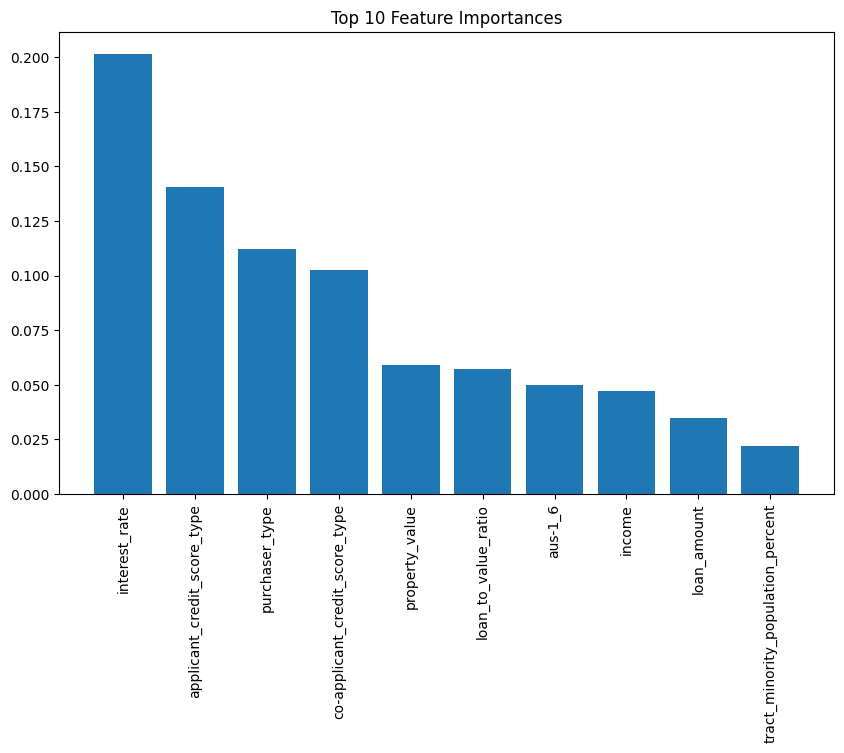

In [10]:
# Get feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top 10 features
plt.figure(figsize=(10,6))
plt.title("Top 10 Feature Importances")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [X.columns[i] for i in indices[:10]], rotation=90)
plt.show()

XG Boost Classifier

In [11]:
# Initialize and train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate Performance
print("🔹 XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:52:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 XGBoost Results:
Accuracy: 0.9297673067036234
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     67458
           1       0.71      0.18      0.29      2763
           2       0.97      0.97      0.97     23020
           3       0.79      0.93      0.85     17646
           4       0.66      0.31      0.42      6285
           5       1.00      1.00      1.00     16712
           6       0.71      0.84      0.77        76
           7       0.84      0.75      0.80       251

    accuracy                           0.93    134211
   macro avg       0.83      0.75      0.76    134211
weighted avg       0.92      0.93      0.92    134211



In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid for XGBoost tuning
# param_grid_xgb = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [3, 6, 9],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # Initialize Grid Search
# grid_search_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
#                                param_grid_xgb, cv=3, n_jobs=-1, verbose=2)

# # Train the model
# grid_search_xgb.fit(X_train, y_train)

# # Best Parameters
# print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

# # Evaluate Tuned Model
# best_xgb = grid_search_xgb.best_estimator_
# y_pred_best_xgb = best_xgb.predict(X_test)

# print("🔹 Tuned XGBoost Results:")
# print("Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
# print(classification_report(y_test, y_pred_best_xgb))
